In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [355]:
train = pd.read_csv(r"E:\LetsUpgrade-AI-ML\Assignments\Day 24 - Decision Tree - Random Forest\titanic-train.csv")
test = pd.read_csv(r"E:\LetsUpgrade-AI-ML\Assignments\Day 24 - Decision Tree - Random Forest\titanic-test.csv")

In [356]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [357]:
train.drop(["PassengerId","Cabin","Ticket","Name"],axis=1,inplace=True)

In [358]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [359]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [360]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.106261,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.223279,0.081656,0.016824,-0.548193
Age,-0.106261,-0.223279,1.000000,-0.201741,-0.214245,0.037581
SibSp,-0.034040,0.081656,-0.201741,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.214245,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.037581,0.160887,0.217532,1.000000


In [361]:
train['Survived'].value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

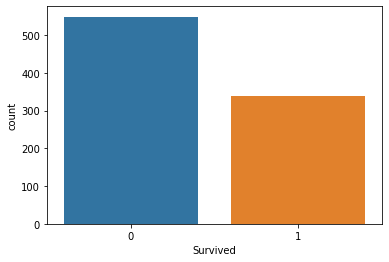

In [362]:
sns.countplot(train['Survived'])

In [363]:
train['Sex'].value_counts(normalize=True)

male      0.649044
female    0.350956
Name: Sex, dtype: float64

In [364]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [365]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Sex']= label_encoder.fit_transform(train['Sex'])
train['Embarked']= label_encoder.fit_transform(train['Embarked']) 

In [366]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [367]:
feature_cols = ['Age','Sex','Fare' ]
X_train = train.iloc[:,[3,2,6]].values
y_train = train.iloc[:,0].values

In [368]:
X_train

array([[22.    ,  1.    ,  7.25  ],
       [38.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  7.925 ],
       ...,
       [45.    ,  0.    , 23.45  ],
       [26.    ,  1.    , 30.    ],
       [32.    ,  1.    ,  7.75  ]])

In [369]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [370]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

In [371]:
X_train

array([[-0.74621945,  0.73534203, -0.50023975],
       [ 0.36963797, -1.35991138,  0.78894661],
       [-0.4672551 , -1.35991138, -0.48664993],
       ...,
       [ 0.85782559, -1.35991138, -0.17408416],
       [-0.4672551 ,  0.73534203, -0.0422126 ],
       [-0.04880856,  0.73534203, -0.49017322]])

In [372]:
tree_model = tree.DecisionTreeClassifier(max_depth=6)
model = tree_model.fit(X_train,y_train)

In [373]:
text_representation = tree.export_text(model, feature_names = feature_cols)
print(text_representation)

|--- Sex <= -0.31
|   |--- Fare <= 0.32
|   |   |--- Fare <= -0.09
|   |   |   |--- Fare <= -0.13
|   |   |   |   |--- Fare <= -0.16
|   |   |   |   |   |--- Fare <= -0.44
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Fare >  -0.44
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  -0.16
|   |   |   |   |   |--- Fare <= -0.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  -0.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Fare >  -0.13
|   |   |   |   |--- Fare <= -0.12
|   |   |   |   |   |--- Age <= -0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  -0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  -0.12
|   |   |   |   |   |--- class: 1
|   |   |--- Fare >  -0.09
|   |   |   |--- Fare <= -0.07
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  -0.07
|   |   |   |   |--- Fare <= 0.24
|   |   |   |   |   |--- Fare <= 0.09
|   |   |   |   |   |   |--- class: 1
|   |   

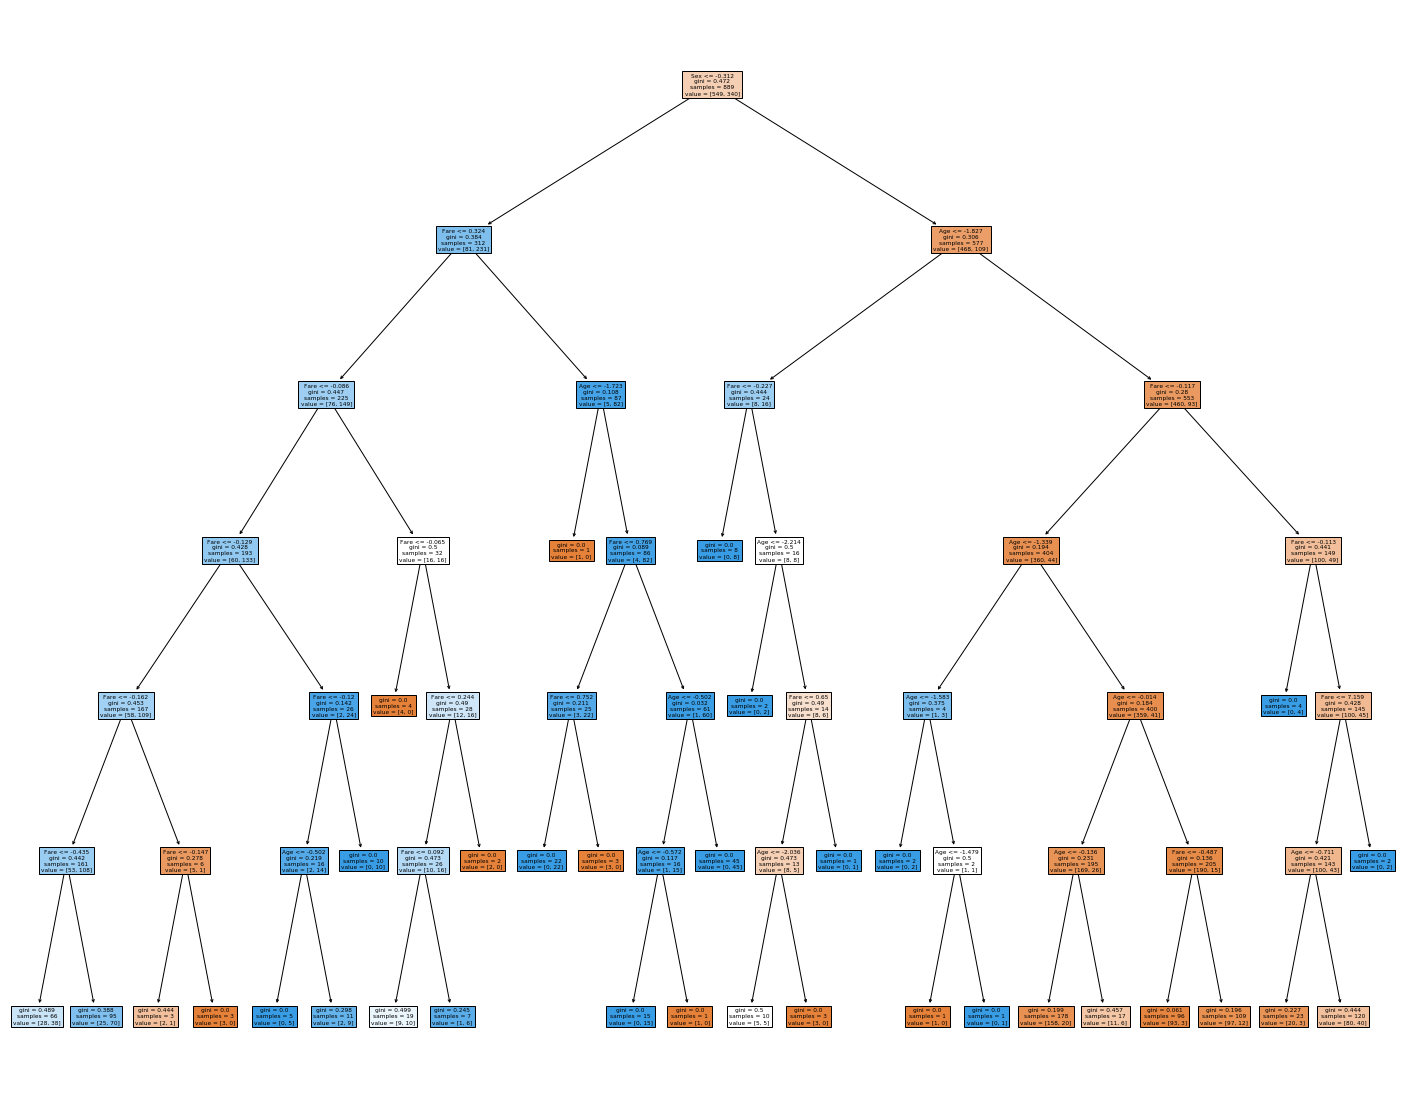

In [374]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['Age','Sex','Fare'],
                   filled=True)

In [375]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=feature_cols,
                                filled=True)


In [376]:
graph = graphviz.Source(dot_data, format='png')

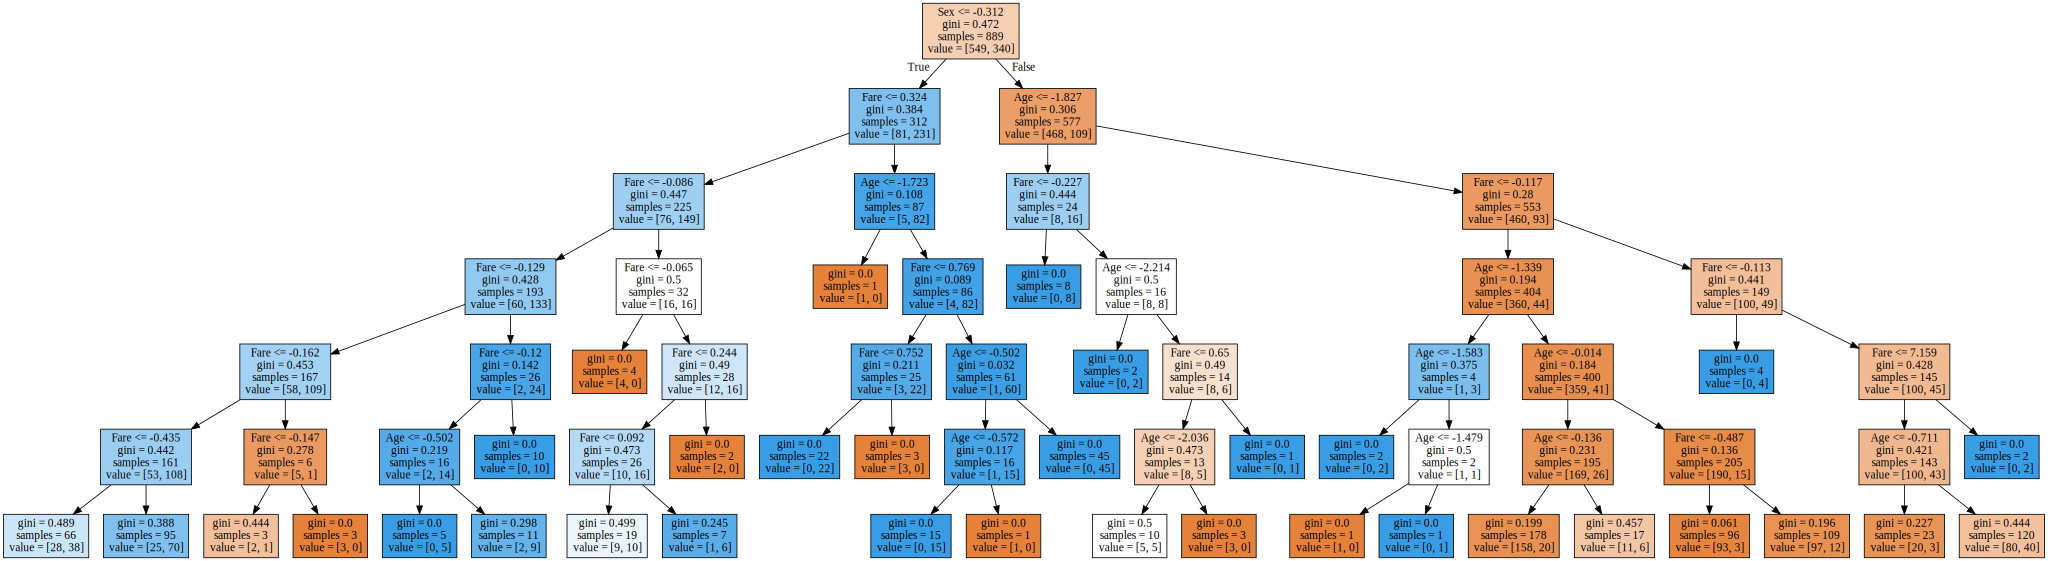

In [377]:
graph

In [378]:
model.score(X_train,y_train)

0.8256467941507312

# Prediction on Test Data

In [379]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test['Sex']= label_encoder.fit_transform(test['Sex'])
test['Embarked']= label_encoder.fit_transform(test['Embarked']) 

In [380]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [381]:
pred_feature_cols = ['Age','Sex','Fare']
X_pred = test.iloc[:,[4,3,8]].values

In [382]:
X_pred

array([[34.5   ,  1.    ,  7.8292],
       [47.    ,  0.    ,  7.    ],
       [62.    ,  1.    ,  9.6875],
       ...,
       [38.5   ,  1.    ,  7.25  ],
       [45.    ,  1.    ,  8.05  ],
       [45.    ,  1.    , 22.3583]])

In [383]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_pred = sc_X.fit_transform(X_pred)

In [384]:
model_pred = tree_model.predict(X_pred)

In [385]:
predicted_output = pd.DataFrame({"Passenger Id":test["PassengerId"],"Survived":model_pred})

In [386]:
predicted_output.to_csv("Survivors.csv",index=False)

In [387]:
predicted_output["Survived"].value_counts()

0    266
1    151
Name: Survived, dtype: int64

# Random Forest Classifier

In [388]:
from sklearn.ensemble import RandomForestClassifier

In [389]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,2
885,1,1,0,19.0,0,0,30.0000,2
886,0,3,0,45.0,1,2,23.4500,2
887,1,1,1,26.0,0,0,30.0000,0


In [390]:
X_train

array([[-0.74621945,  0.73534203, -0.50023975],
       [ 0.36963797, -1.35991138,  0.78894661],
       [-0.4672551 , -1.35991138, -0.48664993],
       ...,
       [ 0.85782559, -1.35991138, -0.17408416],
       [-0.4672551 ,  0.73534203, -0.0422126 ],
       [-0.04880856,  0.73534203, -0.49017322]])

In [391]:
rf_model = RandomForestClassifier(n_estimators=5000, max_features=2,oob_score = True)

In [392]:
rf_feature_cols = ['Age','Sex','Fare']

In [393]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [394]:
print(rf_model.oob_score_)

0.7930258717660292


In [395]:
for feature,imp in zip(rf_feature_cols, rf_model.feature_importances_):
    print(feature,imp)

Age 0.28660352242280623
Sex 0.28454637907892394
Fare 0.4288500984982698
